In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [45]:
#Read the data
colist = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"];
data = pd.read_csv("ToyotaCorolla.csv", usecols=colist,engine='python')
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [46]:
data=data.rename(columns={"Age_08_04":"Age","Quarterly_Tax":"Tax"})
data.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [48]:
data.shape

(1436, 9)

In [49]:
#check for missing values
data.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Tax       0
Weight    0
dtype: int64

In [50]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [51]:
data[data['Price']==24950]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


There is one duplicate record, so we need to delete one out of it.

In [52]:
#data=data.drop(data.index[[113]],axis=0)

data = data.drop_duplicates() 
data.shape

(1435, 9)

In [53]:
data.reindex()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [54]:
data.shape

(1435, 9)

In [55]:
data.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Check for outliers

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

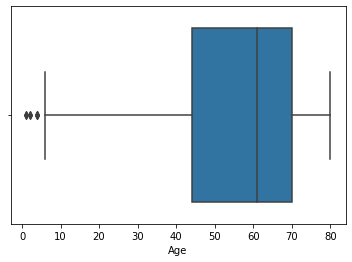

In [56]:
sns.boxplot(data['Age'])

Age : There are 3 outliers with value < 5

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM'>

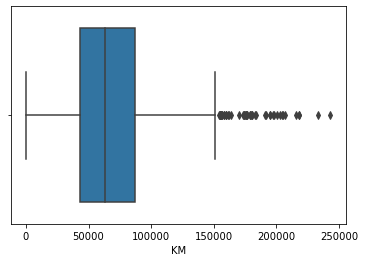

In [57]:
sns.boxplot(data['KM'])

KM : There are multiple outliers 

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP'>

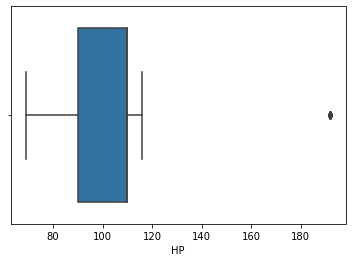

In [58]:
sns.boxplot(data['HP'])

HP : There is 1 outlier with value > 180

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cc'>

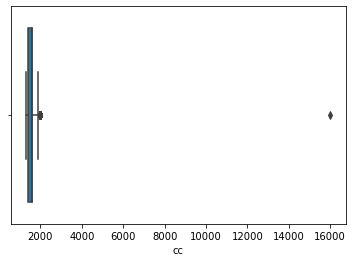

In [59]:
sns.boxplot(data['cc'])

 cc: There is a outlier and rest of the values are very much similar

In [60]:
data['cc'].unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

In [61]:
data[data['cc']==16000]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


looking at the cc values, it seems that 16000 is most possibly a wrong value. It could be 1600. In general we need to ask management/concern person to
edit or adding/updating values in given dataset. So let's update it


In [62]:
data['cc'].replace(16000,1600,inplace=True)

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Doors'>

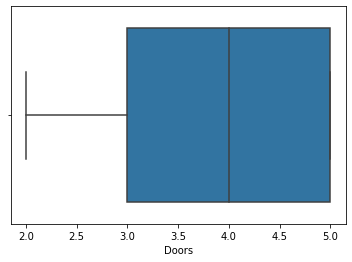

In [63]:
sns.boxplot(data['Doors'])

Doors : no outliers are there

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gears'>

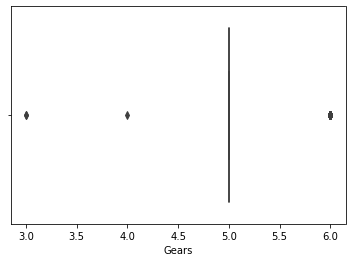

In [64]:
sns.boxplot(data['Gears'])

Gears : we have 3 outliers and rest all of the values are equal to 5

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tax'>

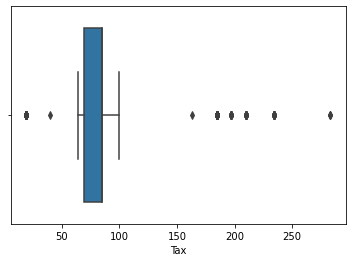

In [65]:
sns.boxplot(data['Tax'])

Tax : There are multiple outliers and rest all of the values are in range 70-90

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

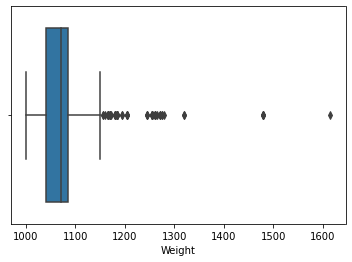

In [66]:
sns.boxplot(data['Weight'])

Weight: There are multiple outliers

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

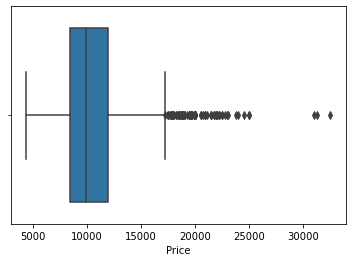

In [67]:
sns.boxplot(data['Price'])

Price : There are multiple outliers

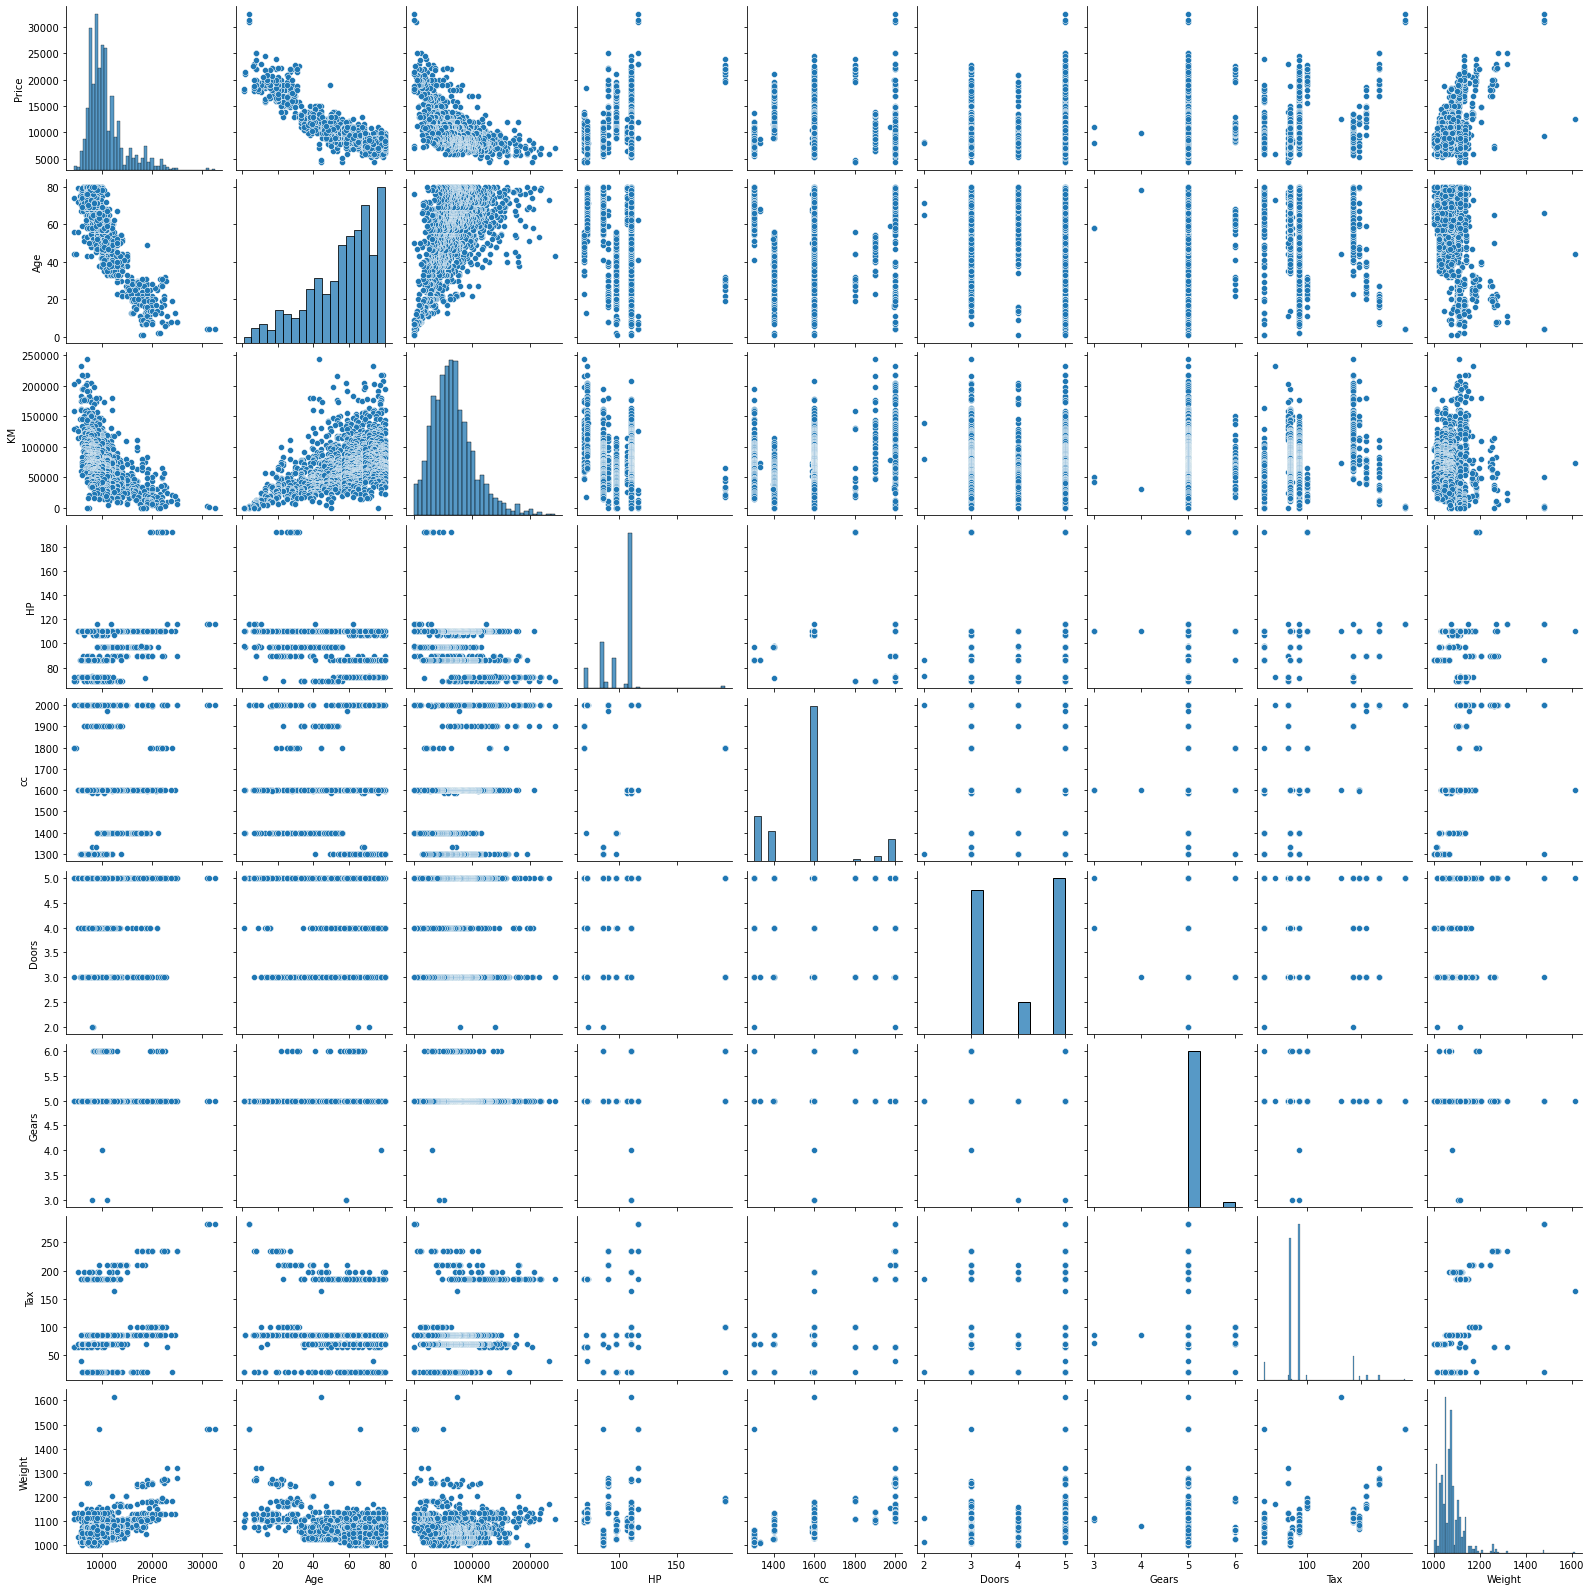

In [68]:
sns.pairplot(data)

In [69]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.159897,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.129564,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.305331,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.049430,0.091803,0.209642,-0.302287,0.087143
cc,0.159897,-0.129564,0.305331,0.049430,1.000000,0.125410,0.040997,0.677765,0.650098
Doors,0.183604,-0.146929,-0.035193,0.091803,0.125410,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.040997,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.677765,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.650098,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

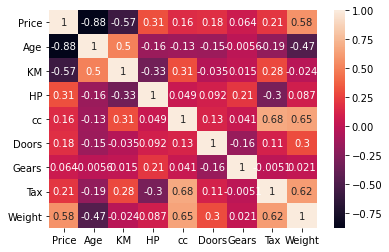

In [70]:
sns.heatmap(data.corr(), annot=True)

1. There is a strong negative correlation between vehicale age and price (-0.88). 
2. Positive correlation between price and weight
3. Negative correlation between price and KM

# Model Building

In [71]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=data).fit()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1178.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:43:53   Log-Likelihood:                -12334.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6236.4131   1383.164     -4.509      0.000   -8949.668   -3523.158
Age         -120.5161      2.561    -47.056      0.000    -125.540    -115.492
KM            -0.0178      0.001    -13.942      0.000      -0.020      -0.015
HP            39.2204      2.912     13.470      0.000      33.509      44.932
cc            -2.5142      0.307     -8.182      0.000      -3.117      -1.911
Doors        -26.3127     39.231     -0.671      0.503    -103.270      50.645
Gears        526.7150    192.815      2.732      0.006     148.483     904.947
Tax            8.9272      1.426      6.259      0.000       6.129      11.725
Weight        20.1112      1.117     18.011      0.000      17.921      22.302
==============================================================================
Omnibus:                      244.598   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2670.494
Skew:                          -0.435   Prob(JB):                         0.00
Kurtosis:                       9.626   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p values for doors is > 0.05, so we can remove these columns, but before that we need to check the significance individually

In [73]:
modelDoors = smf.ols('Price~Doors',data=data).fit()

In [74]:
modelDoors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           2.40e-12
Time:                        22:43:53   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p value is 0, so Doors is significant for predicting price

## Check VIF

In [75]:
rsq_Doors = smf.ols('Doors~Age+KM+HP+cc+Gears+Tax+Weight',data=data).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 
vif_Doors

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+Tax+Weight',data=data).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 
vif_cc

rsq_age = smf.ols('Age~cc+KM+HP+Doors+Gears+Tax+Weight',data=data).fit().rsquared  
vif_age = 1/(1-rsq_age) 
vif_age

rsq_KM = smf.ols('KM~Age+cc+HP+Doors+Gears+Tax+Weight',data=data).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 
vif_KM

rsq_HP = smf.ols('HP~Age+cc+KM+Doors+Gears+Tax+Weight',data=data).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 
vif_HP

rsq_Gears = smf.ols('Gears~Age+cc+KM+Doors+HP+Tax+Weight',data=data).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 
vif_Gears

rsq_Tax = smf.ols('Tax~Age+cc+KM+Doors+HP+Gears+Weight',data=data).fit().rsquared  
vif_Tax = 1/(1-rsq_Tax) 
vif_Tax


rsq_Weight = smf.ols('Weight~Age+cc+KM+Doors+HP+Gears+Tax',data=data).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 
vif_Weight

# Storing vif values in a data frame
d1 = {'Variables':['Doors','cc','Age','KM','HP','Gears','Tax','Weight'],'VIF':[vif_Doors,vif_cc,vif_age,vif_KM,vif_HP,vif_Gears,vif_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1).sort_values(by='VIF') 
Vif_frame

,Variables,VIF
5,Gears,1.101076
0,Doors,1.163364
4,HP,1.584766
2,Age,1.882548
3,KM,1.910353
1,cc,2.747057
7,Weight,2.835107
6,Tax,2.842812


In [76]:
data['Doors'].unique()

array([3, 5, 4, 2], dtype=int64)

There is no any multicolinearity problem, but still the p value for doors is still coming 0.503 > 0.05, so doors is not significant.

In [77]:
modelFinal = smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=data).fit()

In [78]:
modelFinal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1346.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:43:53   Log-Likelihood:                -12334.
No. Observations:                1435   AIC:                         2.468e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6263.8333   1382.293     -4.531      0.000   -8975.379   -3552.288
Age         -120.5189      2.561    -47.066      0.000    -125.542    -115.496
KM            -0.0179      0.001    -13.997      0.000      -0.020      -0.015
HP            39.0388      2.899     13.468      0.000      33.353      44.725
cc            -2.4974      0.306     -8.156      0.000      -3.098      -1.897
Gears        551.6578    189.158      2.916      0.004     180.600     922.716
Tax            8.9574      1.425      6.284      0.000       6.161      11.753
Weight        19.9139      1.077     18.491      0.000      17.801      22.027
==============================================================================
Omnibus:                      237.638   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2527.500
Skew:                          -0.417   Prob(JB):                         0.00
Kurtosis:                       9.448   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>As R2 is good and all p values are < 0.05, we can consider this as the final model</b>

# Model Validation

<b>Residual Plot</b>

In [79]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

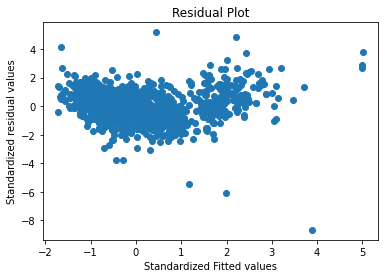

In [80]:
plt.scatter(get_standardized_values(modelFinal.fittedvalues),
            get_standardized_values(modelFinal.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

It's not showing any pattern, it's a random cloud. So model is fine.

<b>QQ Plot</b>

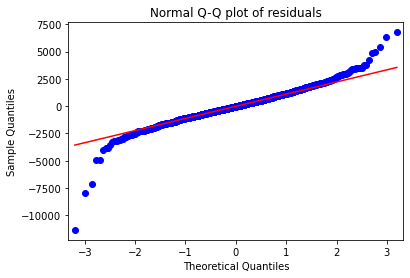

In [81]:
import statsmodels.api as sm
qqplot=sm.qqplot(modelFinal.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Model Deletion Diagnostics

<b>Detecting Influencers/Outliers using Cook's distance</b>

In [82]:
model_influence = modelFinal.get_influence()
(c, _) = model_influence.cooks_distance

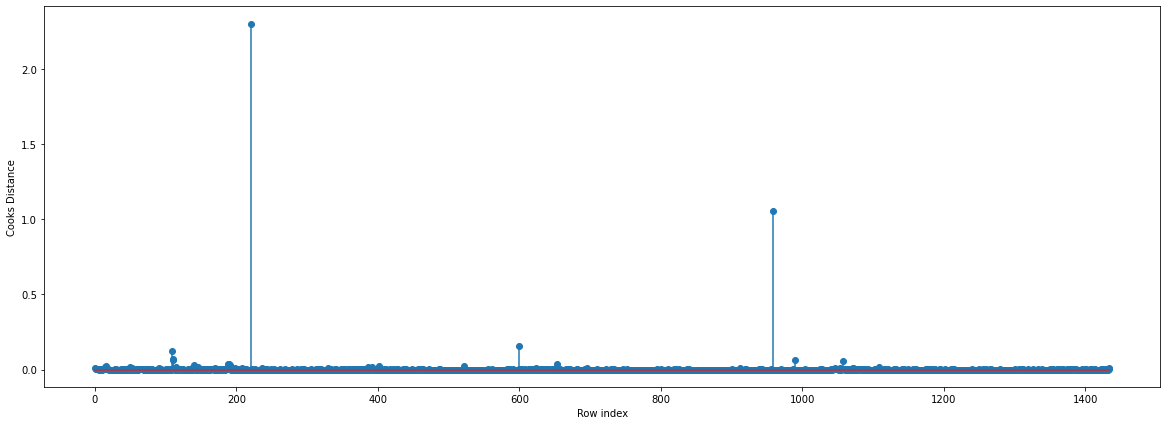

In [83]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(220, 2.304746683949718)

## High Influence points

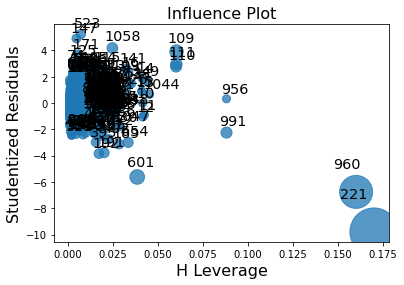

In [85]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(modelFinal)
plt.show()

In [86]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

#### From the above plot, it is evident that data point 221,601,991,960 are the influencers

In [88]:
data[data.index.isin([221,601,991,960])]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
221,12450,44,74172,110,1600,5,5,163,1615
601,7500,50,1,90,2000,3,5,64,1260
960,9390,66,50806,86,1300,3,5,19,1480
991,7950,58,43000,110,1600,4,3,72,1114


## Improving the model

Discard the data points which are influencers and reasign the row number 

In [89]:
data1 =data.drop(data.index[[221,601,991,960]],axis=0).reset_index()

In [90]:
data1.shape

(1431, 10)

In [94]:
data1.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [93]:
data1=data1.drop(['index'],axis=1)

### Second iteration of Model

In [95]:
modelFinal1 = smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=data1).fit()

In [96]:
modelFinal1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1347.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:52:13   Log-Likelihood:                -12299.
No. Observations:                1431   AIC:                         2.461e+04
Df Residuals:                    1423   BIC:                         2.466e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6192.3278   1382.173     -4.480      0.000   -8903.644   -3481.011
Age         -120.5300      2.562    -47.052      0.000    -125.555    -115.505
KM            -0.0179      0.001    -14.039      0.000      -0.020      -0.015
HP            39.0874      2.898     13.489      0.000      33.403      44.772
cc            -2.4932      0.306     -8.143      0.000      -3.094      -1.893
Gears        548.5606    189.072      2.901      0.004     177.670     919.451
Tax            8.9929      1.425      6.312      0.000       6.198      11.788
Weight        19.8564      1.077     18.436      0.000      17.744      21.969
==============================================================================
Omnibus:                      236.399   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2512.528
Skew:                          -0.415   Prob(JB):                         0.00
Kurtosis:                       9.438   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using Cook's distance to detect Influencers/Outliers

In [100]:
model_influence1 = modelFinal1.get_influence()
(c1, _) = model_influence1.cooks_distance

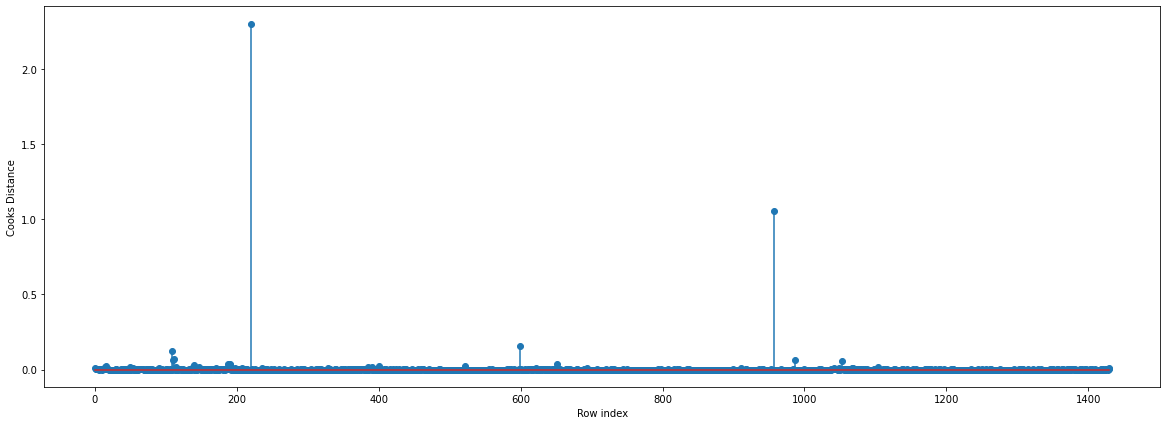

In [101]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

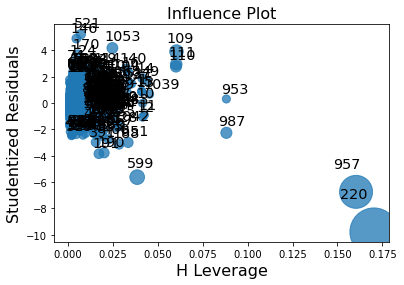

In [102]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(modelFinal1)
plt.show()

In [103]:
data2 =data1.drop(data1.index[[953,987,599,957,220]],axis=0).reset_index()

In [106]:
data2


,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1421,7500,69,20544,86,1300,3,5,69,1025
1422,10845,72,19000,86,1300,3,5,69,1015
1423,8500,71,17016,86,1300,3,5,69,1015
1424,7250,70,16916,86,1300,3,5,69,1015


In [105]:
data2=data2.drop(['index'],axis=1)

### Third iteration of Model

In [107]:
modelFinal2 = smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=data2).fit()

In [108]:
modelFinal2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1612.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:02:54   Log-Likelihood:                -12143.
No. Observations:                1426   AIC:                         2.430e+04
Df Residuals:                    1418   BIC:                         2.434e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.511e+04   1459.316    -10.357      0.000    -1.8e+04   -1.23e+04
Age         -110.7170      2.450    -45.183      0.000    -115.524    -105.910
KM            -0.0180      0.001    -15.165      0.000      -0.020      -0.016
HP            34.1291      2.729     12.505      0.000      28.775      39.483
cc            -3.5405      0.296    -11.975      0.000      -4.121      -2.961
Gears        445.0477    192.076      2.317      0.021      68.265     821.831
Tax            4.0957      1.361      3.008      0.003       1.425       6.766
Weight        30.5762      1.220     25.060      0.000      28.183      32.970
==============================================================================
Omnibus:                       69.816   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.126
Skew:                           0.123   Prob(JB):                     5.83e-49
Kurtosis:                       4.918   Cond. No.                     3.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
model_influence2 = modelFinal2.get_influence()
(c2, _) = model_influence2.cooks_distance

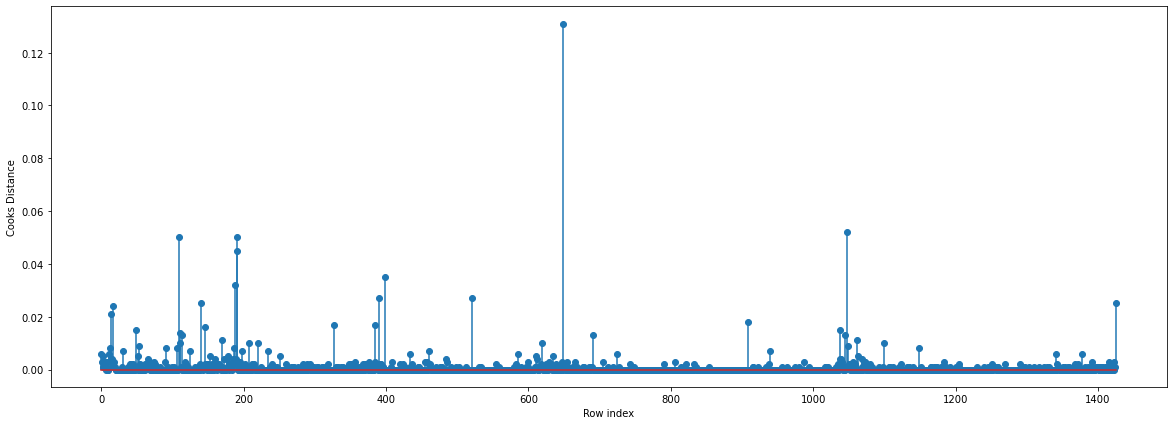

In [110]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

#### Since values are <1 , we can stop the diagnostic process and finalize the model

# Check the accuracy of the model

In [111]:
modelFinalLast = smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=data2).fit()

In [112]:
(modelFinalLast.rsquared,modelFinalLast.aic)

(0.8883747336044234, 24302.538641186824)

In [113]:
(modelFinalLast.rsquared,modelFinalLast.rsquared_adj)

(0.8883747336044234, 0.8878236920918924)

In [114]:
data2

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1421,7500,69,20544,86,1300,3,5,69,1025
1422,10845,72,19000,86,1300,3,5,69,1015
1423,8500,71,17016,86,1300,3,5,69,1015
1424,7250,70,16916,86,1300,3,5,69,1015


# Predicting new data

In [118]:
#New data for prediction
new_data=pd.DataFrame({'Age':22,"KM":4500,"HP":100,"cc":1500,"Gears":5, "Tax":200,"Weight":1000},index=[1])

In [119]:
modelFinalLast.predict(new_data)

1    14092.171791
dtype: float64